In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
dataset = pd.read_csv('non_linear_classification_data.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,56,30795,1
1,25,91820,0
2,36,52194,0


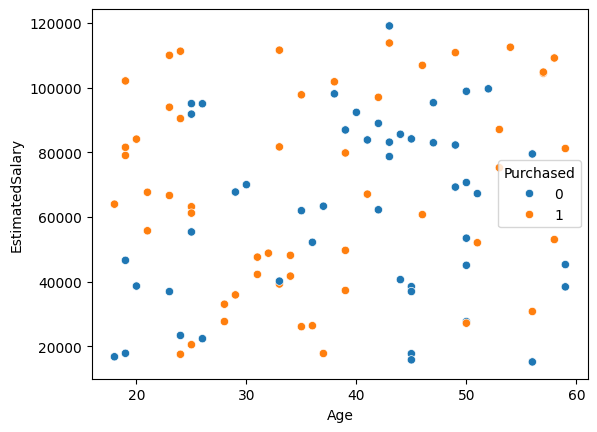

In [111]:
sns.scatterplot(x='Age' , y='EstimatedSalary',data=dataset , hue="Purchased")
plt.show()

In [112]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [113]:
x = dataset.iloc[: , :-1]
y = dataset['Purchased']


In [114]:
# ab is case me age ki value bht kam he or estimated sal bht ziada to hm scalling kare ge

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [116]:
sc.fit(x)

StandardScaler()

In [117]:
x = pd.DataFrame(sc.transform(x) , columns=x.columns)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.20 , random_state=42)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt = DecisionTreeClassifier(max_depth=2)  # pre pruning
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2)

In [122]:
dt.score(x_test , y_test)*100

60.0

In [123]:
#check the overfitting
dt.score(x_train , y_train)*100

72.5

In [124]:
# train and test data ki prediction me bht farq he to matlab hmara model overfitted he
# to ab hm pruning kare ge

In [125]:
from sklearn.tree import plot_tree

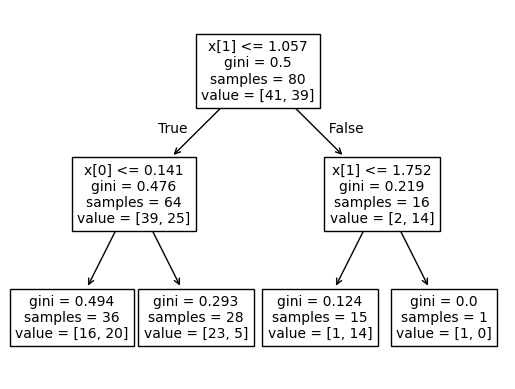

In [126]:
plot_tree(dt)
plt.show()

In [127]:
#using entropy

dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [128]:
dt1.score(x_test , y_test)*100

60.0

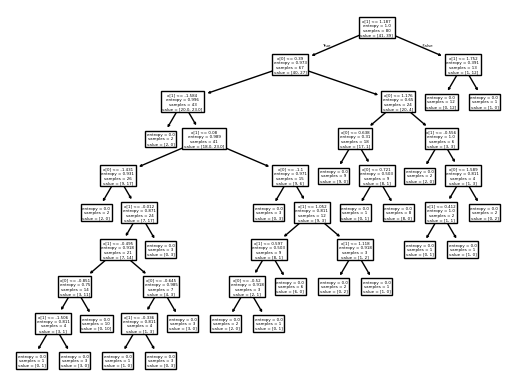

In [129]:
plot_tree(dt1)
plt.show()

In [130]:
#post pruning

for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train , y_train)
    print(dt2.score(x_train , y_train) , dt2.score(x_test , y_test) , i)
 

0.6625 0.25 1
0.725 0.6 2
0.775 0.45 3
0.825 0.7 4
0.925 0.55 5
0.95 0.6 6
0.975 0.55 7
0.9875 0.55 8
1.0 0.6 9
1.0 0.6 10
1.0 0.65 11
1.0 0.65 12
1.0 0.65 13
1.0 0.65 14
1.0 0.65 15
1.0 0.55 16
1.0 0.65 17
1.0 0.6 18
1.0 0.6 19


In [ ]:
# i = 2 pr train and test case kam difference to matlab hm max_dept ki value 2 rakhe ge